In [ ]:
## 以上部分是在测试单因子时的处理过程
import pandas as pd
import numpy as np
train_old = pd.read_pickle("train_merge.pkl")
train_new = pd.read_pickle("train_v4.pkl")
test_old = pd.read_pickle("test_merge.pkl")
test_new = pd.read_pickle("test_v4.pkl")
train_v3 = pd.read_pickle("train_v3.pkl")
new_factors = [x for x in train_new.columns if x not in train_v3.columns and (x not in train_old.columns)]
train_mean = train_new[new_factors].mean()
train_std = train_new[new_factors].std()
train_new[new_factors] = (train_new[new_factors] - train_mean) / train_std
train_new[new_factors] = (
train_new[new_factors]
        .clip(lower=-3, upper=3)  # 将值限制在[-3, 3]范围内
        .replace([np.inf, -np.inf], 0)  # 将无穷大替换为0
        .fillna(0)  # 将NaN替换为0
)
test_new[new_factors] = (test_new[new_factors] - train_mean) / train_std
test_new[new_factors] = (
        test_new[new_factors]
        .clip(lower=-3, upper=3)  # 将值限制在[-3, 3]范围内
        .replace([np.inf, -np.inf], 0)  # 将无穷大替换为0
        .fillna(0)  # 将NaN替换为0
    )
test_new = test_new[['time']+new_factors]
train_new = train_new[['time']+new_factors]
train_merge = pd.merge(left = train_old,right = train_new,on = ['time'],how = 'left')
test_merge = pd.merge(left = test_old,right = test_new,on = ['time'],how = 'left')
train_merge[new_factors].fillna(0.0,inplace=True)
test_merge[new_factors].fillna(0.0,inplace=True)


In [ ]:
test_factors = ['spread', 'bid_depth', 'ask_depth', 'total_depth',
        'order_imbalance', 'OI_MA_10', 'OI_MA_60', 'OI_MA_120', 'OI_MA_300',
        'OI_MA_600', 'OI_momentum_10', 'OI_momentum_120', 'OI_momentum_60',
        'OI_momentum_300', 'OI_momentum_600', 'OI_std_120', 'OI_std_300',
        'OI_std_600', 'OI_skew_120', 'OI_skew_600', 'D_k', 'ES',
        'effective_spread', 'market_pressure', 'SOIR1', 'SOIR2', 'SOIR3',
        'SOIR4', 'SOIR5', 'bid_ask_volume_ratio', 'relative_spread', 'SOIR',
        'SOIR_weighted', 'OFI1', 'OFI2', 'OFI3', 'OFI4', 'OFI5', 'MOFI',
        'vol_std_120', 'vol_std_600', 'vol_skew_120', 'vol_skew_600', 
        'tick_ret', 'vol_mid_corr_120', 'vol_mid_corr_600', 'rp_momentum_120',
        'rp_momentum_600', 'rp_momentum_20',
        'delta2_tick_rolling_1min', 'delta2_tick_rolling_5min', 'delta2_10s',
        'delta2_10s_rolling_1min', 'delta2_10s_rolling_5min', 'delta2_60s',
        'tick_smooth_price_change', 'elasticity_rolling_60s',
        'vol',  'oi_change', 'macd', 'rsi', 'kdj', 'ret_min',
        'pv_corr_10', 'pv_corr_120', 'rv_corr_120', 'rv_corr_10',
        'realized_vol_10', 'realized_vol_60', 'macd_long', 'rsi_short',
        'rsi_long', 'pvol_5min', 'pvol_30min', 'slope', 'price_pos',
        'upper_band', 'lower_band', 'channel_position', 'ret_5min',
        'volume_zscore', 'volume_cluster', 'spread_volatility',
        'volume_oi_ratio', 'oi_support', 'atr','upper_bb', 'lower_bb']+new_factors
linear_factors = [
'pvol_30min',
 'spread_volatility',
 'pvol_5min',
 'atr',
 'vol',
 'realized_vol_10',
 'OI_std_300',
 'OI_std_120',
 'realized_vol_60',
 'OI_std_600',
 'volume_oi_ratio',
 'slope',
 'spread',
 'ES',
 'effective_spread',
 'relative_spread',
 'OI_MA_600',
 'rp_momentum_600',
 'volume_cluster',
 'rp_momentum_20',
 'vol_std_600',
 'rv_corr_120',
 'upper_band',
 'lower_band',
 'oi_change',
 'rsi_short',
 'kdj',
 'upper_bb',
 'lower_bb',
 'rsi_long',
 'oi_support',
 'macd_long',
 'channel_position',
 'macd'
 ,'add_neg_add_realized_vol_60_add_realized_vol_60_abs_pvol_30min_rsi_short_',
 'sub_sub_channel_position_realized_vol_10_abs_neg_macd_',
 'sub_mul_pvol_30min_pvol_30min_rsi_long_',
 'rsi',
 'SOIR5',
 'delta2_10s_rolling_5min',
 'delta2_tick_rolling_1min',
 'ts_mean_ts_mean_ret_5min_',
 'vol_mid_corr_120',
 'neg_ts_mean_upper_bb_',
 'div_abs_ts_mean_ts_mean_volume_cluster_ts_std_rp_momentum_20_',
 'vol_std_120',
 'SOIR4',
 'pv_corr_120',
 'OFI4',
 'tick_ret',
 'buy_volume',
 'ewm_vol_10',
 'sellvol_1min',
 'netflow_10min',
 'bigorder_vol_pct_1min',
 'amivest_lr_30',
 'rp_momentum_600_kdj_corr',
 'rv_corr_120_OFI4_corr',
 'slope',
 'rp_momentum_600',
 'elascity_min',
 'cvar_10',
 'volret_ratio_10',
 'CV_10',
 'skew_upside_10m_rank',
 'OI_std_600_rank',
 'mfi_30m_mean',
 'PSY_60'
 ]

In [ ]:
## 筛选单因子
Factor_test = train_merge[test_factors].corrwith(train_merge['ret_600']).to_frame("train_ic")
Factor_test['test_ic'] = test_merge[test_factors].corrwith(test_merge['ret_600'])
Factor_test['train_long'] = 0.0
Factor_test['train_short'] = 0.0
Factor_test['test_long'] = 0.0
Factor_test['test_short'] = 0.0
for factor in new_factors:
    print(factor)
    Factor_test.loc[factor,'train_long'] = train_merge[train_merge[factor]>train_merge[factor].quantile(0.95)]['ret_600'].mean()
    Factor_test.loc[factor,'test_long'] = test_merge[test_merge[factor]>test_merge[factor].quantile(0.95)]['ret_600'].mean()
    Factor_test.loc[factor,'test_short'] = test_merge[test_merge[factor]<test_merge[factor].quantile(0.05)]['ret_600'].mean()
    Factor_test.loc[factor,'train_short'] = train_merge[train_merge[factor]<train_merge[factor].quantile(0.05)]['ret_600'].mean()
Factor_test['train_ret'] = Factor_test['train_long'] - Factor_test['train_short']
Factor_test['test_ret'] = Factor_test['test_long'] - Factor_test['test_short']
Factor_test.sort_values(by = 'train_ret')

In [12]:
Factor_test[(Factor_test['train_ic']>0.01)&(Factor_test['train_ret']>0)&(Factor_test['test_ret']>3e-5)].sort_values(by = 'test_ret',ascending=False).index[1:]

Index(['emv_10min', 'cvar_10', 'macd', 'coppock_5_10_30m', 'amplitude_30',
       'coppock_10_15_30m', 'volweight_bigorder_ret', 'rp_momentum_120',
       'cci_30', 'cvar_30'],
      dtype='object')

In [21]:
Factor_V1 = ['fuzziness', 'ewm_vol_10', 'ret_kurt_120', 'upper_bb',
       'realized_vol_60', 'realized_vol_10', 'bigsellvolpct_30min', 'cls_abs_var_30','emv_10min', 'cvar_10', 'macd',  'amplitude_30', 'volweight_bigorder_ret', 
       'rp_momentum_120',
       'cci_30', 'cvar_30']
len(Factor_V1)


16

In [19]:
corr_matrix = test_merge[Factor_V1].corr()
corr_matrix[corr_matrix>0.85]

,fuzziness,ewm_vol_10,ret_kurt_120,upper_bb,realized_vol_60,ewm_vol_30,realized_vol_10,Ivol_30,pvol_30min,bigsellvolpct_30min,...,emv_10min,cvar_10,macd,coppock_5_10_30m,amplitude_30,coppock_10_15_30m,volweight_bigorder_ret,rp_momentum_120,cci_30,cvar_30
fuzziness,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ewm_vol_10,NaN,1.00000,NaN,NaN,NaN,0.898310,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ret_kurt_120,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
upper_bb,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
realized_vol_60,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ewm_vol_30,NaN,0.89831,NaN,NaN,NaN,1.000000,NaN,0.935421,0.936540,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
realized_vol_10,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ivol_30,NaN,NaN,NaN,NaN,NaN,0.935421,NaN,1.000000,0.999328,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pvol_30min,NaN,NaN,NaN,NaN,NaN,0.936540,NaN,0.999328,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bigsellvolpct_30min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
test_factors = ['spread', 'bid_depth', 'ask_depth', 'total_depth',
        'order_imbalance', 'OI_MA_10', 'OI_MA_60', 'OI_MA_120', 'OI_MA_300',
        'OI_MA_600', 'OI_momentum_10', 'OI_momentum_120', 'OI_momentum_60',
        'OI_momentum_300', 'OI_momentum_600', 'OI_std_120', 'OI_std_300',
        'OI_std_600', 'OI_skew_120', 'OI_skew_600', 'D_k', 'ES',
        'effective_spread', 'market_pressure', 'SOIR1', 'SOIR2', 'SOIR3',
        'SOIR4', 'SOIR5', 'bid_ask_volume_ratio', 'relative_spread', 'SOIR',
        'SOIR_weighted', 'OFI1', 'OFI2', 'OFI3', 'OFI4', 'OFI5', 'MOFI',
        'vol_std_120', 'vol_std_600', 'vol_skew_120', 'vol_skew_600', 
        'tick_ret', 'vol_mid_corr_120', 'vol_mid_corr_600', 'rp_momentum_120',
        'rp_momentum_600', 'rp_momentum_20',
        'delta2_tick_rolling_1min', 'delta2_tick_rolling_5min', 'delta2_10s',
        'delta2_10s_rolling_1min', 'delta2_10s_rolling_5min', 'delta2_60s',
        'tick_smooth_price_change', 'elasticity_rolling_60s',
        'vol',  'oi_change', 'macd', 'rsi', 'kdj', 'ret_min',
        'pv_corr_10', 'pv_corr_120', 'rv_corr_120', 'rv_corr_10',
        'realized_vol_10', 'realized_vol_60', 'macd_long', 'rsi_short',
        'rsi_long', 'pvol_5min', 'pvol_30min', 'slope', 'price_pos',
        'upper_band', 'lower_band', 'channel_position', 'ret_5min',
        'volume_zscore', 'volume_cluster', 'spread_volatility',
        'volume_oi_ratio', 'oi_support', 'atr','upper_bb', 'lower_bb']
linear_factors = [
        'pvol_30min',
 'spread_volatility',
 'pvol_5min',
 'atr',
 'vol',
 'realized_vol_10',
 'OI_std_300',
 'OI_std_120',
 'realized_vol_60',
 'OI_std_600',
 'volume_oi_ratio',
 'spread',
 'ES',
 'effective_spread',
 'relative_spread',
 'OI_MA_600',
 'rp_momentum_600',
 'volume_cluster',
 'rp_momentum_20',
 'vol_std_600',
 'rv_corr_120',
 'upper_band',
 'lower_band',
 'oi_change',
 'rsi_short',
 'kdj',
 'upper_bb',
 'lower_bb',
 'rsi_long',
 'oi_support',
 'macd_long',
 'channel_position',
 'macd'
 ,'add_neg_add_realized_vol_60_add_realized_vol_60_abs_pvol_30min_rsi_short_',
 'sub_sub_channel_position_realized_vol_10_abs_neg_macd_',
 'sub_mul_pvol_30min_pvol_30min_rsi_long_',
 'rsi',
 'SOIR5',
 'delta2_10s_rolling_5min',
 'delta2_tick_rolling_1min',
 'ts_mean_ts_mean_ret_5min_',
 'vol_mid_corr_120',
 'neg_ts_mean_upper_bb_',
 'div_abs_ts_mean_ts_mean_volume_cluster_ts_std_rp_momentum_20_',
 'vol_std_120',
 'SOIR4',
 'pv_corr_120',
 'OFI4',
 'tick_ret',
 'buy_volume',
 'ewm_vol_10',
 'sellvol_1min',
 'netflow_10min',
 'bigorder_vol_pct_1min',
 'amivest_lr_30',
 'rp_momentum_600_kdj_corr',
 'rv_corr_120_OFI4_corr',
 'slope',
 'rp_momentum_600',
 'elascity_min',
 'cvar_10',
 'volret_ratio_10',
 'CV_10',
 'skew_upside_10m_rank',
 'OI_std_600_rank',
 'mfi_30m_mean',
 'sellvolpct_10min',
 'AB_vol',
 'PSY_60',
 'sq_down_return',
 'dtm',
 'skew_overall_10m_mean',
 'cci_30_mean',
 'effective_depth_30min_mean_30',
 'PSY_60_mean_30',
 'amihud_ratio_60_mean_30',
 'big_buy_volume_rank',
 'rsj_30_rank',
 'elascity_min_CV_10_corr'
 ,'netflow_10min_oi_change_corr'
 ]

In [195]:
len(linear_factors)

80

In [155]:
train_merge[new_factors].corrwith(test_merge['ret_600']).sort_values()

D:\Anaconda\envs\MLDL\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Anaconda\envs\MLDL\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
D:\Anaconda\envs\MLDL\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Anaconda\envs\MLDL\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
D:\Anaconda\envs\MLDL\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
D:\Anaconda\envs\MLDL\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
D:\Anaconda\envs\MLDL\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encounter

vr_30               -0.020722
buyvolpct_30min     -0.019471
adl_10              -0.018875
mfi_30m             -0.016958
vr_10               -0.016775
                       ...   
flow_in_ratio_10m         NaN
flow_in_ratio_30m         NaN
up_vol_ratio_10           NaN
up_vol_ratio_30           NaN
ar_10                     NaN
Length: 169, dtype: float64

In [ ]:
['cci_30_mean','cvar_10','ewm_vol_10','bigorder_vol_pct_1min','amivest_lr_30','amihud_ratio_60_mean_30','PSY_60_mean_30']

In [103]:
train_merge[['pvol_30min','realized_vol_60','atr','vol_std_600','realized_vol_10']].corr()

,pvol_30min,realized_vol_60,atr,vol_std_600,realized_vol_10
pvol_30min,1.000000,0.603436,0.660344,0.148009,0.534265
realized_vol_60,0.603436,1.000000,0.396351,0.049166,0.412147
atr,0.660344,0.396351,1.000000,0.179137,0.297484
vol_std_600,0.148009,0.049166,0.179137,1.000000,0.209291
realized_vol_10,0.534265,0.412147,0.297484,0.209291,1.000000


In [ ]:
test_factors = test_factors+[x for x in linear_factors if x not in test_factors]+[x for x in new_factors if x not in linear_factors and x != 'tick100_ret']

ValueError: 'tick100_ret' is not in list

In [53]:
# test_factors = test_factors+[x for x in linear_factors if x not in test_factors]+[x for x in new_factors if x not in linear_factors and x != 'tick100_ret']
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import TimeSeriesSplit

# 創建時間序列交叉驗證器
tscv = TimeSeriesSplit(n_splits=5)
X_train = train_merge[test_factors]
X_test = test_merge[test_factors]
y_train = train_merge['ret_600']
y_test = test_merge['ret_600']
# 使用 ElasticNetCV，它會自動進行交叉驗證來尋找最佳的 alpha 和 l1_ratio
print("正在使用 ElasticNetCV 進行因子篩選...")
elastic_net_cv = ElasticNetCV(
    l1_ratio=[.1, .5, .7, .9, .95, .99, 1], # 測試不同的 L1/L2 混合比例
    cv=tscv,
    n_jobs=-1,
    max_iter=10000
)
elastic_net_cv.fit(X_train, y_train)

print(f"找到最佳 Alpha: {elastic_net_cv.alpha_:.6f}")
print(f"找到最佳 L1 Ratio: {elastic_net_cv.l1_ratio_:.2f}")

正在使用 ElasticNetCV 進行因子篩選...
找到最佳 Alpha: 0.000032
找到最佳 L1 Ratio: 1.00


In [54]:
# 獲取模型係數
coefficients = elastic_net_cv.coef_

# 篩選出係數不為零的因子
selected_features_mask = coefficients != 0
selected_features = X_train.columns[selected_features_mask]

print(f"\n模型從 {len(X_train.columns)} 個因子中篩選出了 {len(selected_features)} 個有效因子:")
print(selected_features.tolist())

# 您可以查看被賦予較大權重的因子
coef_df = pd.DataFrame({
    'factor': X_train.columns,
    'coefficient': coefficients
})
# 篩選並按係數絕對值大小排序
significant_coefs = coef_df[coef_df['coefficient'] != 0].sort_values(
    by='coefficient', 
    key=abs, 
    ascending=False
)
print("\n--- 最重要的幾個因子及其係數 ---")
print(significant_coefs.head(10))


模型從 280 個因子中篩選出了 2 個有效因子:
['add_neg_add_realized_vol_60_add_realized_vol_60_abs_pvol_30min_rsi_short_', 'div_abs_ts_mean_ts_mean_volume_cluster_ts_std_rp_momentum_20_']

--- 最重要的幾個因子及其係數 ---
                                               factor   coefficient
90  add_neg_add_realized_vol_60_add_realized_vol_6...  2.511506e-06
95  div_abs_ts_mean_ts_mean_volume_cluster_ts_std_... -1.807323e-07


In [202]:
train_merge = pd.merge(left = train_merge,right = train_old[['time','date']],on = ['time'],how = 'left')
test_merge = pd.merge(left = test_merge,right = test_old[['time','date']],on = ['time'],how = 'left')


In [217]:
from sklearn.linear_model import Ridge
def generate_positions_classification(df: pd.DataFrame, hold_time: int) -> pd.DataFrame:
    """
    *** 新增: 根据分类预测结果生成仓位 ***
    'pred' 列现在是类别 (0, 1, 2)
    """
    print("开始根据分类结果生成仓位信号...")
    df_with_pos = df.copy()
    all_positions = []
    df_with_pos.set_index(['date','time'],inplace = True)
    df_with_pos.sort_values(by='time', inplace=True)
    
    active_signal = 0  # 0: 无, 1: 多, -1: 空
    signal_hold_counter = 0
    for date, daily_data in df_with_pos.groupby(level='date'):
        positions_today = pd.Series(index=daily_data.index, dtype=int)
        
        for i in range(len(daily_data)):
            current_pred_class = daily_data['pred'].iloc[i]
            
            # 1. 检查新信号
            if current_pred_class == 1: # 新的多头信号
                active_signal = 1
                signal_hold_counter = hold_time
            elif current_pred_class == 2: # 新的空头信号
                active_signal = -1
                signal_hold_counter = hold_time
            
            # 2. 更新持仓倒计时
            if active_signal != 0:
                signal_hold_counter -= 1
            
            # 3. 确定当前仓位
            current_position = 0
            if active_signal != 0 and signal_hold_counter >= 0:
                current_position = active_signal
            else:
                active_signal = 0 # 信号过期
            
            # 4. 日末强制平仓
            if i == len(daily_data) - 1:
                current_position = 0
            
            positions_today.iloc[i] = current_position

        all_positions.append(positions_today)
        
    df_with_pos['position'] = pd.concat(all_positions)
    print("仓位信号生成完毕。")
    return df_with_pos
import matplotlib.pyplot as plt
def calculate_ticksize(df_with_pos: pd.DataFrame, 
                    commission: float, 
                    initial_capital: float = 10000000) -> pd.DataFrame:
    """
    根据给定的仓位列计算每日损益和资金曲线。

    参数:
    df_with_pos (pd.DataFrame): 带有'position'列的DataFrame。
    commission (float): 开仓手续费率（基于当日总资金）。
    initial_capital (float): 初始资金。

    返回:
    pd.DataFrame: 包含每日净值、损益和收益率的结果DataFrame。
    """
    print("开始根据仓位计算收益...")
    capital = 0.0
    net_values = [0.0]
    all_daily_pnl = []
    all_daily_ret = []
    unique_dates = df_with_pos.index.get_level_values('date').unique()
    date_open = []
    for date in unique_dates:
        daily_data = df_with_pos.loc[date]
        entry_price = 0
        capital_for_the_day = capital
        daily_pnl = 0
        open_times = 0
        # 使用shift(1)来获取前一分钟的仓位，方便判断仓位变化
        position_changes = daily_data['position'].diff().fillna(daily_data['position'].iloc[0])

        for i in range(len(daily_data)):
            # 仅在仓位发生变化时进行交易计算
            if position_changes.iloc[i] != 0:
                prev_position = daily_data['position'].iloc[i] - position_changes.iloc[i]
                target_position = daily_data['position'].iloc[i]
                # a. 如果之前有仓位，则先平仓
                if prev_position != 0:
                    if prev_position == 1:  # 平多仓
                        exit_price = daily_data['askp1_trade'].iloc[i]
                        pnl = (exit_price - entry_price) / 0.02
                        daily_pnl += pnl
                    elif prev_position == -1:  # 平空仓
                        exit_price = daily_data['bidp1_trade'].iloc[i]
                        pnl = (entry_price - exit_price) / 0.02
                        daily_pnl += pnl
                    entry_price = 0

                # b. 如果目标是建立新仓位，则开仓
                if target_position != 0:
                    # **修正后的手续费计算**
    
                    open_times += 1
                    if target_position == 1:  # 开多仓
                        entry_price = daily_data['bidp1_trade'].iloc[i]
                    elif target_position == -1:  # 开空仓
                        entry_price = daily_data['askp1_trade'].iloc[i]
                        
                    daily_pnl -= 1

        # 5. 更新每日资本
        capital += daily_pnl
        daily_ret = (daily_pnl*0.02) / ((daily_data['bidp1_trade'].iloc[0]+daily_data['askp1_trade'].iloc[0])/2)
        all_daily_ret.append(daily_ret)
        net_values.append(capital)
        all_daily_pnl.append(daily_pnl)
        date_open.append(open_times)
    # 6. 创建结果DataFrame
    results_df = pd.DataFrame({
        'date': unique_dates,
        'net_value': net_values[1:],
        'daily_pnl': all_daily_pnl,
        "opentimes":date_open,
        'daily_return':all_daily_ret
    })
    print("收益计算完毕。")
    print(results_df['daily_return'].sum())
    results_df['Net_Value'] = (1+results_df['daily_return']).cumprod()
    results_df.to_csv("res_linear.csv")
    # plt.plot((results_df['daily_ret']+1).cumprod())
    return results_df['daily_pnl'].sum() / results_df['opentimes'].sum() , results_df['opentimes'].mean(),results_df['Net_Value'].iloc[-1],(results_df['Net_Value']/results_df['Net_Value'].cummax()).min()  - 1
RidgeModel = Ridge(alpha=1)
X_train = train_merge[linear_factors]
X_test = test_merge[linear_factors]
y_train = train_merge['ret_600']
y_test = test_merge['ret_600']
RidgeModel.fit(X_train,y_train)
y_pred = RidgeModel.predict(X_test)
print(np.corrcoef([y_pred,y_test])[0,1])
test_merge['pred'] = 0
test_merge.loc[y_pred>np.quantile(y_pred,0.95),'pred'] = 1
test_merge.loc[y_pred<np.quantile(y_pred,0.05),'pred'] = 2
print(y_test[y_pred>np.quantile(y_pred,0.95)].mean()-y_test[y_pred<np.quantile(y_pred,0.05)].mean())
df_with_pos = generate_positions_classification(test_merge,hold_time=5)
calculate_ticksize(df_with_pos,commission=0.02)

0.050152387179495
0.00022319359004535676
开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
0.32734495206507064


(5.699938003719732,
 7.572769953051643,
 1.3834420112134285,
 -0.016986569820782838)

In [222]:
train_merge.to_pickle("Train_final.pkl")
test_merge.to_pickle("Test_final.pkl")

In [221]:
train_merge[linear_factors].std()

pvol_30min                      0.682211
spread_volatility               0.578869
pvol_5min                       0.562534
atr                             0.860769
vol                             0.241658
                                  ...   
amihud_ratio_60_mean_30         1.000000
big_buy_volume_rank             1.000000
rsj_30_rank                     1.000000
elascity_min_CV_10_corr         1.000000
netflow_10min_oi_change_corr    1.000000
Length: 80, dtype: float64

In [214]:
def generate_positions_classification(df: pd.DataFrame, hold_time: int) -> pd.DataFrame:
    """
    *** 新增: 根据分类预测结果生成仓位 ***
    'pred' 列现在是类别 (0, 1, 2)
    """
    print("开始根据分类结果生成仓位信号...")
    df_with_pos = df.copy()
    all_positions = []
    df_with_pos.set_index(['date','time'],inplace = True)
    df_with_pos.sort_values(by='time', inplace=True)
    
    active_signal = 0  # 0: 无, 1: 多, -1: 空
    signal_hold_counter = 0
    for date, daily_data in df_with_pos.groupby(level='date'):
        positions_today = pd.Series(index=daily_data.index, dtype=int)
        
        for i in range(len(daily_data)):
            current_pred_class = daily_data['pred'].iloc[i]
            
            # 1. 检查新信号
            if current_pred_class == 1: # 新的多头信号
                active_signal = 1
                signal_hold_counter = hold_time
            elif current_pred_class == 2: # 新的空头信号
                active_signal = -1
                signal_hold_counter = hold_time
            
            # 2. 更新持仓倒计时
            if active_signal != 0:
                signal_hold_counter -= 1
            
            # 3. 确定当前仓位
            current_position = 0
            if active_signal != 0 and signal_hold_counter >= 0:
                current_position = active_signal
            else:
                active_signal = 0 # 信号过期
            
            # 4. 日末强制平仓
            if i == len(daily_data) - 1:
                current_position = 0
            
            positions_today.iloc[i] = current_position

        all_positions.append(positions_today)
        
    df_with_pos['position'] = pd.concat(all_positions)
    print("仓位信号生成完毕。")
    return df_with_pos
import matplotlib.pyplot as plt
def calculate_pnl(df_with_pos: pd.DataFrame, 
                    commission: float, 
                    initial_capital: float = 10000000) -> pd.DataFrame:
    """
    根据给定的仓位列计算每日损益和资金
    曲线。

    参数:
    df_with_pos (pd.DataFrame): 带有'position'列的DataFrame。
    commission (float): 开仓手续费率（基于当日总资金）。
    initial_capital (float): 初始资金。

    返回:
    pd.DataFrame: 包含每日净值、损益和收益率的结果DataFrame。
    """
    print("开始根据仓位计算收益...")
    capital = 10000000
    net_values = [capital]
    all_daily_pnl = []
    all_daily_ret = []
    df_with_pos.set_index(['date'],inplace=True)
    unique_dates = df_with_pos.index.unique()
    tick_pnl = []
    open_nums = []
    win_nums = []
    for date in unique_dates:
        daily_data = df_with_pos.loc[date]
        entry_price = 0
        capital_for_the_day = capital
        daily_pnl = 0
        open_dates = 0
        win_dates = 0
        print(daily_data)
        # 使用shift(1)来获取前一分钟的仓位，方便判断仓位变化
        position_changes = daily_data['position'].diff().fillna(daily_data['position'].iloc[0])
        open_price = (daily_data['askp1_trade'].iloc[0]+daily_data['bidp1_trade'].iloc[0])/2
        for i in range(len(daily_data)):
            # 仅在仓位发生变化时进行交易计算
            if position_changes.iloc[i] != 0:
                prev_position = daily_data['position'].iloc[i] - position_changes.iloc[i]
                target_position = daily_data['position'].iloc[i]
                
                # a. 如果之前有仓位，则先平仓
                if prev_position != 0:
                    if prev_position == 1:  # 平多仓
                        exit_price = daily_data['askp1_trade'].iloc[i]
                        pnl = (exit_price - entry_price)
                        daily_pnl += pnl
                    elif prev_position == -1:  # 平空仓
                        exit_price = daily_data['bidp1_trade'].iloc[i]
                        pnl = (entry_price - exit_price)
                        daily_pnl += pnl
                        tick_pnl += (entry_price - exit_price)/0.02
                    if pnl> 0.02:
                        win_dates += 1
                    entry_price = 0

                # b. 如果目标是建立新仓位，则开仓
                if target_position != 0:
                    # **修正后的手续费计算**
                    if target_position == 1:  # 开多仓
                        entry_price = daily_data['bidp1_trade'].iloc[i]
                    elif target_position == -1:  # 开空仓
                        entry_price = daily_data['askp1_trade'].iloc[i]
                    daily_pnl -= 0.02
                    open_dates += 1
        daily_ret = daily_pnl / open_price
        # 5. 更新每日资本
        capital += daily_pnl
        net_values.append(capital)
        all_daily_pnl.append(daily_pnl)
        all_daily_ret.append(daily_ret)
        open_nums.append(open_dates)
        win_nums.append(win_dates)

    # 6. 创建结果DataFrame
    results_df = pd.DataFrame({
        'date': unique_dates,
        'net_value': net_values[1:],
        'daily_pnl': all_daily_pnl,
        "daily_return": all_daily_ret,
        "open_nums":open_nums,
        "win_nums":win_nums
    })
    print("收益计算完毕。")
    return results_df
df_with_pos = generate_positions_classification(test_merge,hold_time=5)
df_with_pos.reset_index(inplace=True)
df_with_pos.sort_values(by = 'time',inplace=True)
res = calculate_pnl(df_with_pos,commission=0.02)
res.to_csv("res_linear.csv")

开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
                              time  symbol     tdate  preclose    open  \
date                                                                     
2024-01-02 2024-01-02 09:00:00.500  au2402  20240102     481.7     NaN   
2024-01-02 2024-01-02 09:01:00.500  au2402  20240102     481.7  481.32   
2024-01-02 2024-01-02 09:02:01.000  au2402  20240102     481.7  480.95   
2024-01-02 2024-01-02 09:03:04.500  au2402  20240102     481.7  481.19   
2024-01-02 2024-01-02 09:04:10.000  au2402  20240102     481.7  481.43   
...                            ...     ...       ...       ...     ...   
2024-01-02 2024-01-02 14:47:19.000  au2402  20240102     481.7  483.31   
2024-01-02 2024-01-02 14:48:44.000  au2402  20240102     481.7  483.29   
2024-01-02 2024-01-02 14:50:03.500  au2402  20240102     481.7  483.41   
2024-01-02 2024-01-02 14:51:20.500  au2402  20240102     481.7  483.27   
2024-01-02 2024-01-02 14:52:45.500  au2402  20240102     481.7  483.35

In [211]:
df_with_pos

symbol     tdate  preclose    open  \
date       time                                                          
2024-01-02 2024-01-02 09:00:00.500  au2402  20240102    481.70     NaN   
           2024-01-02 09:01:00.500  au2402  20240102    481.70  481.32   
           2024-01-02 09:02:01.000  au2402  20240102    481.70  480.95   
           2024-01-02 09:03:04.500  au2402  20240102    481.70  481.19   
           2024-01-02 09:04:10.000  au2402  20240102    481.70  481.43   
...                                    ...       ...       ...     ...   
2024-11-20 2024-11-20 14:49:36.500  au2412  20241120    609.84  611.09   
           2024-11-20 14:50:50.500  au2412  20241120    609.84  611.06   
           2024-11-20 14:52:10.500  au2412  20241120    609.84  610.93   
           2024-11-20 14:53:16.000  au2412  20241120    609.84  610.75   
           2024-11-20 14:54:24.500  au2412  20241120    609.84  610.89   

                                      high     low    last  totalvolume  \
date       time                                                           
2024-01-02 2024-01-02 09:00:00.500     NaN     NaN  481.36           90   
           2024-01-02 09:01:00.500  481.35  480.84  480.94         1129   
           2024-01-02 09:02:01.000  481.21  480.93  481.20         1589   
           2024-01-02 09:03:04.500  481.41  481.19  481.42         1900   
           2024-01-02 09:04:10.000  481.51  481.35  481.44         2260   
...                                    ...     ...     ...          ...   
2024-11-20 2024-11-20 14:49:36.500  611.11  610.99  611.04       169937   
           2024-11-20 14:50:50.500  611.07  610.85  610.92       170143   
           2024-11-20 14:52:10.500  610.97  610.73  610.74       170402   
           2024-11-20 14:53:16.000  610.89  610.75  610.88       170607   
           2024-11-20 14:54:24.500  610.93  610.77  610.88       170813   

                                    totalturnover  presettle  ...  \
date       time                                               ...   
2024-01-02 2024-01-02 09:00:00.500       43311540     481.42  ...   
           2024-01-02 09:01:00.500      543131240     481.42  ...   
           2024-01-02 09:02:01.000      764428760     481.42  ...   
           2024-01-02 09:03:04.500      914116000     481.42  ...   
           2024-01-02 09:04:10.000     1087426640     481.42  ...   
...                                           ...        ...  ...   
2024-11-20 2024-11-20 14:49:36.500   103860212820     605.78  ...   
           2024-11-20 14:50:50.500   103986072080     605.78  ...   
           2024-11-20 14:52:10.500   104144289200     605.78  ...   
           2024-11-20 14:53:16.000   104269508040     605.78  ...   
           2024-11-20 14:54:24.500   104395343820     605.78  ...   

                                    struct_rev_10  struct_rev_30  \
date       time                                                    
2024-01-02 2024-01-02 09:00:00.500      -0.253988       0.250629   
           2024-01-02 09:01:00.500      -0.394304      -0.075258   
           2024-01-02 09:02:01.000      -0.829394       0.030282   
           2024-01-02 09:03:04.500      -0.882299       0.337941   
           2024-01-02 09:04:10.000      -0.833435       0.217170   
...                                           ...            ...   
2024-11-20 2024-11-20 14:49:36.500      -0.255738       0.354225   
           2024-11-20 14:50:50.500      -0.339149       0.391592   
           2024-11-20 14:52:10.500      -1.298357       0.495620   
           2024-11-20 14:53:16.000      -1.340378       0.380206   
           2024-11-20 14:54:24.500      -1.334610       0.423291   

                                    volume_threshold  trend_10  trend_30  \
date       time                                                            
2024-01-02 2024-01-02 09:00:00.500         -1.043651  0.000000  0.000000   
           2024-01-02 09:01:00.500         -1.043651  0.000000  0.000000   
          

In [204]:
y_test[y_pred>np.quantile(y_pred,0.95)].mean(),y_test[y_pred<np.quantile(y_pred,0.05)].mean()

(8.676381232979904e-05, -0.00013642977771555773)

In [41]:
len(new_factors)

170

开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
money_flow 0.043527228577697
6.569995778870986e-05 -6.445994736082127e-05
1.211518714897732
开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
effective_depth_30min 0.042727716147357646
6.833977931676777e-05 -9.7677395254787e-05
1.332539335494449
开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
dtm 0.043356436729693956
7.356093816711411e-05 -9.728342349362821e-05
1.344963181514217
开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
bigorder_vol_1min 0.04402189299335969
7.929813707547024e-05 -9.074897880442418e-05
1.3251874383864122
开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
rs_vol_10 0.04339636443675587
6.125379763003038e-05 -9.942939994859353e-05
1.2903951859639065
开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
ner_inflow_std_min 0.04190525668260363
7.022140038642777e-05 -0.0001004217049865402
1.3282339931319198
开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
effective_depth_min 0.04238266930471139
6.532007817153232e-05 -9.70

,ic,long,short,netvalue,ret
sq_down_return,0.042793,0.000072,-0.000097,1.377408,0.000169
down_variance_term,0.042793,0.000072,-0.000097,1.377408,0.000169
bigsellvolpct_5min,0.042697,0.000078,-0.000101,1.357024,0.000179
skew_upside_10m,0.042658,0.000077,-0.000102,1.355901,0.000179
weight_buysell_30,0.042696,0.000078,-0.000101,1.355147,0.000178
dtm,0.043356,0.000074,-0.000097,1.344963,0.000171
effective_depth_30min,0.042728,0.000068,-0.000098,1.332539,0.000166
weight_ret_skew_30min,0.042878,0.000071,-0.000106,1.332257,0.000176
ner_inflow_std_min,0.041905,0.000070,-0.000100,1.328234,0.000171
bigbuy_volume_min,0.043896,0.000073,-0.000095,1.326042,0.000168


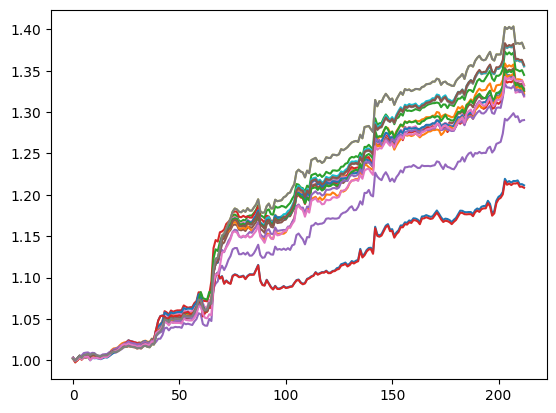

In [92]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
factor_test = pd.DataFrame(columns = ['ic','long','short','netvalue'])
new_factors = [x for x in train_new.columns if x not in train_v3.columns and (x not in train_old.columns) and x!='tick100_ret']
for factor in test_factors:
    if factor in linear_factors:
        continue
    RidgeModel = Ridge(alpha=1)
    X_train = train_merge[linear_factors+[factor]]
    X_test = test_merge[linear_factors+[factor]]
    y_train = train_merge['ret_600']
    y_test = test_merge['ret_600']
    RidgeModel.fit(X_train,y_train)
    y_pred = RidgeModel.predict(X_test)
    test_merge['pred'] = 0
    test_merge.loc[y_pred>np.quantile(y_pred,0.95),'pred'] = 1
    test_merge.loc[y_pred<np.quantile(y_pred,0.05),'pred'] = 2
    df_with_pos = generate_positions_classification(test_merge,hold_time=5)
    _,_,net_value,_ = calculate_ticksize(df_with_pos,commission=0.02)
    factor_test.loc[factor] = [np.corrcoef([y_pred,y_test])[0,1],y_test[y_pred>np.quantile(y_pred,0.95)].mean(),y_test[y_pred<np.quantile(y_pred,0.05)].mean(),net_value]
    
    print(factor,np.corrcoef([y_pred,y_test])[0,1])
    print(y_test[y_pred>np.quantile(y_pred,0.95)].mean(),y_test[y_pred<np.quantile(y_pred,0.05)].mean())
    print(net_value)
factor_test['ret'] = factor_test['long'] - factor_test['short']
factor_test.sort_values(by = 'netvalue',ascending=False,inplace=True)
factor_test

In [90]:
factor_test.sort_values(by = 'netvalue',ascending=False).index[:10]

Index(['sq_down_return', 'down_variance_term', 'effective_depth_min',
       'effective_depth_30min', 'effective_depth_5min', 'bigsellvolpct_5min',
       'skew_upside_10m', 'PSY_60', 'weight_buysell_30', 'ner_inflow_std_min'],
      dtype='object')

In [123]:
from numba import njit
def ts_mean(x1):
    arr = np.array(x1)
    cumulative_sum = np.cumsum(np.insert(arr, 0, 0))
    window_size = 30
    # 2. 通过累积和的差值计算每个窗口的和
    # cumulative_sum[window_size:] 是每个窗口结束位置的总和
    # cumulative_sum[:-window_size] 是每个窗口起始位置之前的总和
    # 两者相减即为每个窗口内元素的和
    rolling_sum = cumulative_sum[window_size:] - cumulative_sum[:-window_size]
    
    # 3. 除以窗口大小得到平均值
    rolling_mean = rolling_sum / window_size
    
    # 4. 创建一个用NaN填充的结果数组，并将计算出的均值填入正确位置
    # 前 window_size - 1 个值因为无法形成完整窗口，所以为 NaN
    result = np.full(arr.shape, np.nan)
    for i in range(window_size - 1):
        result[i] = np.sum(arr[:i+1])/(i+1)
    result[window_size - 1:] = rolling_mean
    return result
def ts_std(x1):
    """
    使用 NumPy 高效计算一维数组的滚动标准差。

    参数:
    - arr (np.ndarray): 输入的一维 NumPy 数组。
    - window_size (int): 滚动的窗口大小。

    返回:
    - np.ndarray: 包含滚动标准差的数组。
    """
    arr = np.array(x1)
    window_size = 10
    mean_arr = ts_mean(arr)
    
    # 计算X^2的滚动均值
    mean_sq_arr = ts_mean(arr**2)
    
    # 计算滚动方差：E[X^2] - (E[X])^2
    rolling_var = mean_sq_arr - mean_arr**2
    
    # 返回滚动标准差
    # 对于极小的负数（浮点误差导致），使用np.maximum确保其为0
    return np.sqrt(np.maximum(rolling_var, 0))

def ts_corr(x1,x2):
    arr1 = np.array(x1)
    arr2 = np.array(x2)
    window_size = 15
    mean_x = ts_mean(arr1)
    mean_y = ts_mean(arr2)
    mean_xy = ts_mean(arr1 * arr2)
    rolling_cov = mean_xy - mean_x * mean_y
    
    # 计算两个序列的滚动标准差
    rolling_std_x = ts_std(arr1)
    rolling_std_y = ts_std(arr2)
    
    # 计算相关系数，并处理分母为0的情况
    denominator = rolling_std_x * rolling_std_y
    # 使用 np.divide 的 where 参数来避免除零错误
    rolling_correlation = np.divide(
        rolling_cov, 
        denominator, 
        out=np.full(arr1.shape, 0.0), # 默认输出NaN
        where=denominator!=0
    )
    return rolling_correlation
@njit(nogil=True, cache=True)
def ts_beta(x, y):
    """
    计算两个时间序列之间的回归斜率（beta）
    
    参数:
        x (np.array): 自变量时间序列
        y (np.array): 因变量时间序列
    
    返回:
        float: 回归斜率值
    """
    n = len(x)
    # 边界条件处理
    if n == 0 or len(y) != n:
        return 0.0
    
    # 初始化统计量
    count = 0
    sum_x = 0.0
    sum_y = 0.0
    sum_xy = 0.0
    sum_x2 = 0.0
    
    # 遍历序列，跳过NaN值
    for i in range(n):
        if np.isnan(x[i]) or np.isnan(y[i]):
            continue
        
        count += 1
        sum_x += x[i]
        sum_y += y[i]
        sum_xy += x[i] * y[i]
        sum_x2 += x[i] * x[i]
    
    # 处理不足有效点的情况
    if count < 2:
        return 0.0
    
    # 计算斜率
    mean_x = sum_x / count
    mean_y = sum_y / count
    numerator = sum_xy - sum_x * mean_y
    denominator = sum_x2 - sum_x * mean_x
    
    # 处理分母为零的情况
    if np.abs(denominator) < 1e-10:
        return 0.0
    
    return numerator / denominator
@njit(nogil=True, cache=True)
def ts_rank(series):
    """
    计算时间序列最后一个元素在非NaN值中的归一化排名
    
    参数:
        series (np.array): 一维时间序列数组
    
    返回:
        float: 最后一个元素的归一化排名值[0,1]，特殊情况返回0.5
    """
    n = len(series)
    if n == 0:
        return 0.5
    
    last_val = series[-1]
    if np.isnan(last_val):
        return 0.5
    
    # 提取非NaN值并统计
    valid_mask = ~np.isnan(series)
    valid_values = series[valid_mask]
    valid_count = len(valid_values)
    
    if valid_count == 0:
        return 0.5
    
    # 统计小于last_val的数量
    less_count = 0
    for val in valid_values:
        if val < last_val:
            less_count += 1
    
    # 处理所有值相等的情况
    if valid_values.min() == valid_values.max():
        return 0.5
    
    # 计算归一化排名并手动裁剪
    rank = (less_count + 0.5) / (valid_count - 1)
    if rank < 0.0:
        return 0.0
    elif rank > 1.0:
        return 1.0
    return rank

In [ ]:
factor_test = pd.DataFrame(columns = ['ic','long','short','netvalue'])
for factor in new_factors:
    train_merge[f"{factor}_mean_30"] = ts_mean(train_merge[factor])
    test_merge[f"{factor}_mean_30"] = ts_mean(test_merge[factor])
    train_mean_factor = train_merge[f"{factor}_mean_30"].mean()
    train_std_factor = train_merge[f"{factor}_mean_30"].std()
    train_merge[f"{factor}_mean_30"] = ((train_merge[f"{factor}_mean_30"] - train_mean_factor) / train_std_factor).fillna(0.0)
    test_merge[f"{factor}_mean_30"] = ((test_merge[f"{factor}_mean_30"] - train_mean_factor) / train_std_factor).fillna(0.0)
    
    factor = f"{factor}_mean_30"
    if factor in linear_factors:
        continue
# for factor in [x for x in new_factors if x not in linear_factors]:
    RidgeModel = Ridge(alpha=1)
    X_train = train_merge[[x for x in linear_factors if x != factor]+[factor]]
    X_test = test_merge[[x for x in linear_factors if x != factor]+[factor]]
    y_train = train_merge['ret_600']
    y_test = test_merge['ret_600']
    RidgeModel.fit(X_train,y_train)
    y_pred = RidgeModel.predict(X_test)
    # print(factor,np.corrcoef([y_pred,y_test])[0,1])
    test_merge['pred'] = 0
    test_merge.loc[y_pred>np.quantile(y_pred,0.95),'pred'] = 1
    test_merge.loc[y_pred<np.quantile(y_pred,0.05),'pred'] = 2
    df_with_pos = generate_positions_classification(test_merge,hold_time=5)
    _,_,net_value,_ = calculate_ticksize(df_with_pos,commission=0.02)
    factor_test.loc[factor] = [np.corrcoef([y_pred,y_test])[0,1],y_test[y_pred>np.quantile(y_pred,0.95)].mean(),y_test[y_pred<np.quantile(y_pred,0.05)].mean(),net_value]
    
    print(factor,np.corrcoef([y_pred,y_test])[0,1])
    print(y_test[y_pred>np.quantile(y_pred,0.95)].mean(),y_test[y_pred<np.quantile(y_pred,0.05)].mean())
    print(net_value)
    if net_value <= 1.37:
        train_merge.drop(columns=[factor],inplace=True)
        test_merge.drop(columns=[factor],inplace=True)
factor_test['ret'] = factor_test['long'] - factor_test['short']
factor_test.sort_values(by = 'netvalue',ascending=False,inplace=True)

收益计算完毕。
PSY_10_rank 0.04548329180413093
7.706886877036827e-05 -0.00010723233835059798
1.386639055510149


C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_merge[f"{factor}_rank"] = train_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)
C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_merge[f"{factor}_rank"] = test_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)


开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
PSY_30_rank 0.04602228691977138
7.865090236479932e-05 -0.00010786039244925459
1.3554677179539565


C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_merge[f"{factor}_rank"] = train_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)
C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_merge[f"{factor}_rank"] = test_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)


开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
PSY_60_rank 0.04332382566529582
6.89875135575662e-05 -0.00010530555995975564
1.345506699995676


C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_merge[f"{factor}_rank"] = train_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)
C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_merge[f"{factor}_rank"] = test_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)


开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
struct_rev_10_rank 0.045128607328716805
7.070125245428145e-05 -0.00011153522784050179
1.339781656104556


C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_merge[f"{factor}_rank"] = train_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)
C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_merge[f"{factor}_rank"] = test_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)


开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
struct_rev_30_rank 0.04548040497027561
7.944932563267831e-05 -0.00010764125063460792
1.3542577111379397


C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_merge[f"{factor}_rank"] = train_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)
C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_merge[f"{factor}_rank"] = test_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)


开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
volume_threshold_rank 0.045713726257315755
7.043491114751682e-05 -0.00010851519760334969
1.337090778276806


C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_merge[f"{factor}_rank"] = train_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)
C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_merge[f"{factor}_rank"] = test_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)


开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
trend_10_rank 0.045715479755404305
6.811494924303547e-05 -0.00010706989063724556
1.3497493397703242


C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_merge[f"{factor}_rank"] = train_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)
C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_merge[f"{factor}_rank"] = test_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)


开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
trend_30_rank 0.04544194230399368
7.69596617133011e-05 -0.0001074371972604232
1.390570729790013


C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_merge[f"{factor}_rank"] = train_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)
C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_merge[f"{factor}_rank"] = test_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)


开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
turnover_5min_rank 0.045399884417805014
7.699971727365943e-05 -0.00010486423361146206
1.3907816142110097


C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_merge[f"{factor}_rank"] = train_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)
C:\Users\fjsvm\AppData\Local\Temp\ipykernel_19220\2256042462.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  test_merge[f"{factor}_rank"] = test_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)


开始根据分类结果生成仓位信号...
仓位信号生成完毕。
开始根据仓位计算收益...
收益计算完毕。
turnover_10min_rank 0.045416366118762194
7.420933765625856e-05 -0.00010579536533996798
1.3869396801162863


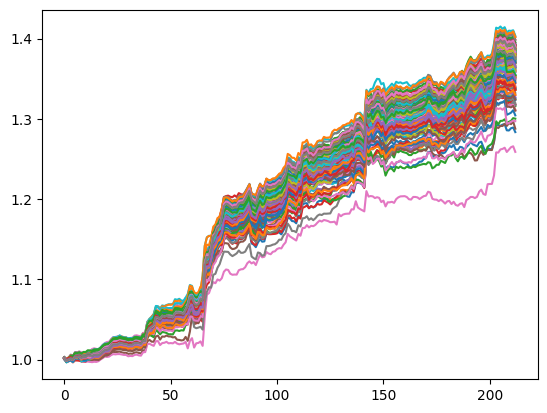

In [140]:
factor_test = pd.DataFrame(columns = ['ic','long','short','netvalue'])
for factor in new_factors:
    train_merge[f"{factor}_rank"] = train_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)
    test_merge[f"{factor}_rank"] = test_merge[factor].rolling(30,min_periods=5).apply(ts_rank,raw = True).fillna(0.0)
    train_mean_factor = train_merge[f"{factor}_rank"].mean()
    train_std_factor = train_merge[f"{factor}_rank"].std()
    train_merge[f"{factor}_rank"] = ((train_merge[f"{factor}_rank"] - train_mean_factor) / train_std_factor).fillna(0.0)
    test_merge[f"{factor}_rank"] = ((test_merge[f"{factor}_rank"] - train_mean_factor) / train_std_factor).fillna(0.0)
    
    factor = f"{factor}_rank"
    if factor in linear_factors:
        continue
# for factor in [x for x in new_factors if x not in linear_factors]:
    RidgeModel = Ridge(alpha=1)
    X_train = train_merge[[x for x in linear_factors if x != factor]+[factor]]
    X_test = test_merge[[x for x in linear_factors if x != factor]+[factor]]
    y_train = train_merge['ret_600']
    y_test = test_merge['ret_600']
    RidgeModel.fit(X_train,y_train)
    y_pred = RidgeModel.predict(X_test)
    # print(factor,np.corrcoef([y_pred,y_test])[0,1])
    test_merge['pred'] = 0
    test_merge.loc[y_pred>np.quantile(y_pred,0.95),'pred'] = 1
    test_merge.loc[y_pred<np.quantile(y_pred,0.05),'pred'] = 2
    df_with_pos = generate_positions_classification(test_merge,hold_time=5)
    _,_,net_value,_ = calculate_ticksize(df_with_pos,commission=0.02)
    factor_test.loc[factor] = [np.corrcoef([y_pred,y_test])[0,1],y_test[y_pred>np.quantile(y_pred,0.95)].mean(),y_test[y_pred<np.quantile(y_pred,0.05)].mean(),net_value]
    
    print(factor,np.corrcoef([y_pred,y_test])[0,1])
    print(y_test[y_pred>np.quantile(y_pred,0.95)].mean(),y_test[y_pred<np.quantile(y_pred,0.05)].mean())
    print(net_value)
    if net_value <= 1.36:
        train_merge.drop(columns=[factor],inplace=True)
        test_merge.drop(columns=[factor],inplace=True)
factor_test['ret'] = factor_test['long'] - factor_test['short']
factor_test.sort_values(by = 'netvalue',ascending=False,inplace=True)

In [188]:
factor_test.sort_values(by = 'ic',ascending=False)

,ic,long,short,netvalue
elascity_min_CV_10_corr,0.050186,0.000087,-0.000134,1.377944
elascity_min_rsi_corr,0.049215,0.000106,-0.000120,1.302741
netflow_10min_rsi_corr,0.048995,0.000081,-0.000110,1.353520
cvar_10_netflow_10min_corr,0.048860,0.000081,-0.000110,1.339967
cci_30_netflow_10min_corr,0.048222,0.000072,-0.000114,1.356564
...,...,...,...,...
dtm_spread_corr,0.046213,0.000076,-0.000112,1.364510
oi_change_kdj_corr,0.046210,0.000085,-0.000117,1.377997
slope_pvol_5min_corr,0.046202,0.000090,-0.000103,1.351214
rsi_spread_volatility_corr,0.046201,0.000079,-0.000108,1.371039


In [ ]:
def label_dynamic_quantiles(df: pd.DataFrame, 
                              price_col: str = 'close', 
                              forward_window: int = 10, 
                              lookback_window: int = 240, 
                              quantile: float = 0.05) -> pd.DataFrame:
    """
    為時間序列數據生成動態分位數分類標籤。

    Args:
        df (pd.DataFrame): 包含價格數據的 DataFrame。
        price_col (str): 價格列的名稱。
        forward_window (int): 計算未來收益率的向前窗口期 (N)。
        lookback_window (int): 計算歷史分位數的回看窗口期 (M)。
        quantile (float): 用於定義標籤的分位數 (q)。

    Returns:
        pd.DataFrame: 增加了 'label' 列的新 DataFrame。
    """
    print("開始生成動態分位數標籤...")
    df_labeled = df.copy()

    # 步驟 1: 計算未來 N 分鐘的收益率作為預測目標
    # (Close_{t+N} / Close_t) - 1
    future_returns = df_labeled[price_col].pct_change(periods=forward_window).shift(-forward_window)
    df_labeled['future_return'] = future_returns

    # 步驟 2: 計算滾動的歷史分位數閾值
    # 使用 .shift(1) 是為了確保在 t 時刻計算閾值時，只使用 t-1 之前的歷史數據，避免未來數據洩漏
    upper_threshold = future_returns.rolling(window=lookback_window).quantile(1 - quantile).shift(1)
    lower_threshold = future_returns.rolling(window=lookback_window).quantile(quantile).shift(1)
    
    df_labeled['upper_threshold'] = upper_threshold
    df_labeled['lower_threshold'] = lower_threshold

    # 步驟 3: 根據條件生成標籤
    conditions = [
        df_labeled['future_return'] >= df_labeled['upper_threshold'],
        df_labeled['future_return'] <= df_labeled['lower_threshold']
    ]
    choices = [1, -1]
    
    df_labeled['label'] = np.select(conditions, choices, default=0)
    
    print("標籤生成完畢。")
    return df_labeled.dropna(subset = ['label'])
result_df = label_dynamic_quantiles(
        train_merge,
        forward_window=5,      # 預測未來10分鐘
        lookback_window=240,    # 回看過去240分鐘 (約1個交易日)
        quantile=0.05           # 上下 5% 作為信號
    )

In [67]:
factor_test.sort_values(by = 'netvalue',ascending=False).index[:50]

Index(['AB_vol', 'coppock_5_10_30m', 'tick_lcp', 'flow_in_ratio_10m',
       'flow_in_ratio_30m', 'ar_10', 'TrendStrenth_10', 'up_vol_ratio_10',
       'up_vol_ratio_30', 'pvol_oi_ratio', 'TrendStrenth_30', 'tick_hcp',
       'bigsellvolpct_10min', 'weight_buysell_30', 'skew_overall_10m',
       'weight_buysell_10', 'skew_upside_10m', 'volret_ratio_30',
       'bigsellvolpct_5min', 'effective_depth', 'lr_minute',
       'effective_depth_min', 'turnover_5min', 'PSY_10', 'sellvolpct_30min',
       'CV_30', 'is_bigorder', 'price_elascity', 'ret_kurt_10', 'sq_up_return',
       'up_sq_return', 'up_variance_term', 'netflow_10min_std',
       'effective_depth_30min', 'sellvolpct_10min', 'is_sellorder',
       'turnover_10min', 'net_inflow', 'ner_inflow_std_min',
       'skew_downside_30m', 'fuzzy_corr', 'struct_rev_30', 'bigbuyvolpct_1min',
       'buyvolpct_30min', 'variance_diff_10m', 'bigsell_volume_min',
       'netflow_30min', 'bigbuyvolpct_30min', 'effective_depth_5min',
       'illiq_

In [119]:
test_factors = list(set(['rs_vol_30_mean', 'regression_factor_10_mean', 'cci_30_mean',
       'avedev_10_mean', 'hurst_30_mean', 'buyvolpct_10min_mean', 'dtm_mean',
       'is_sellorder_mean', 'is_up_mean', 'pelas_5min_mean', 'rsj_30_mean',
       'PSY_60_mean', 'skew_upside_30m_mean', 'Ivol_10_mean', 'avedev_30_mean',
       'PSY_10_mean', 'amivest_lr_10_mean', 'bigsellvolpct_1min_mean',
       'ddi_30_mean', 'trend_10_mean', 'amihud_ratio_60_mean',
       'skew_upside_10m_mean', 'vr_10_mean', 'skew_overall_10m_mean',
       'effective_depth_mean', 'sellvolpct_1min_mean',
       'skew_downside_10m_mean', 'weight_ret_skew_30min_mean', 'cmo_30_mean',
       'struct_rev_10_mean','skew_overall_10m_mean', 'bigsellvolpct_10min_mean', 'is_buyorder_mean',
       'ret_kurt_120_mean', 'rsj_30_mean', 'net_inflow_min_mean',
       'avedev_30_mean', 'PSY_10_mean', 'skew_upside_30m_mean',
       'netflow_30min_mean', 'ret_kurt_30_mean', 'weight_buysell_30_mean',
       'cci_30_mean', 'cmo_30_mean', 'netflow_5min_mean', 'fuzziness_mean',
       'sellvolpct_1min_mean', 'buyvolpct_30min_mean', 'vr_10_mean',
       'volweight_bigorder_ret_mean', 'emv_30min_mean', 'vcv_10_mean',
       'weight_buysell_10_mean', 'flow_in_ratio_10m_mean', 'tick_lcp_mean',
       'up_vol_ratio_30_mean', 'mfi_30m_mean', 'flow_in_ratio_30m_mean',
       'tick_hcp_mean', 'TrendStrenth_10_mean']))
test_factors

['PSY_60_mean',
 'struct_rev_10_mean',
 'ret_kurt_120_mean',
 'buyvolpct_30min_mean',
 'TrendStrenth_10_mean',
 'PSY_10_mean',
 'avedev_30_mean',
 'hurst_30_mean',
 'volweight_bigorder_ret_mean',
 'flow_in_ratio_30m_mean',
 'dtm_mean',
 'Ivol_10_mean',
 'is_buyorder_mean',
 'skew_overall_10m_mean',
 'trend_10_mean',
 'weight_buysell_30_mean',
 'rs_vol_30_mean',
 'sellvolpct_1min_mean',
 'amivest_lr_10_mean',
 'netflow_30min_mean',
 'mfi_30m_mean',
 'emv_30min_mean',
 'avedev_10_mean',
 'tick_lcp_mean',
 'regression_factor_10_mean',
 'ddi_30_mean',
 'skew_downside_10m_mean',
 'weight_ret_skew_30min_mean',
 'skew_upside_10m_mean',
 'pelas_5min_mean',
 'tick_hcp_mean',
 'cci_30_mean',
 'effective_depth_mean',
 'vcv_10_mean',
 'flow_in_ratio_10m_mean',
 'up_vol_ratio_30_mean',
 'bigsellvolpct_10min_mean',
 'net_inflow_min_mean',
 'rsj_30_mean',
 'ret_kurt_30_mean',
 'weight_buysell_10_mean',
 'amihud_ratio_60_mean',
 'buyvolpct_10min_mean',
 'fuzziness_mean',
 'bigsellvolpct_1min_mean',
 '

In [159]:
linear_factors

['pvol_30min',
 'spread_volatility',
 'pvol_5min',
 'atr',
 'vol',
 'realized_vol_10',
 'OI_std_300',
 'OI_std_120',
 'realized_vol_60',
 'OI_std_600',
 'volume_oi_ratio',
 'slope',
 'spread',
 'ES',
 'effective_spread',
 'relative_spread',
 'OI_MA_600',
 'rp_momentum_600',
 'volume_cluster',
 'rp_momentum_20',
 'vol_std_600',
 'rv_corr_120',
 'upper_band',
 'lower_band',
 'oi_change',
 'rsi_short',
 'kdj',
 'upper_bb',
 'lower_bb',
 'rsi_long',
 'oi_support',
 'macd_long',
 'channel_position',
 'macd',
 'add_neg_add_realized_vol_60_add_realized_vol_60_abs_pvol_30min_rsi_short_',
 'sub_sub_channel_position_realized_vol_10_abs_neg_macd_',
 'sub_mul_pvol_30min_pvol_30min_rsi_long_',
 'rsi',
 'SOIR5',
 'delta2_10s_rolling_5min',
 'delta2_tick_rolling_1min',
 'ts_mean_ts_mean_ret_5min_',
 'vol_mid_corr_120',
 'neg_ts_mean_upper_bb_',
 'div_abs_ts_mean_ts_mean_volume_cluster_ts_std_rp_momentum_20_',
 'vol_std_120',
 'SOIR4',
 'pv_corr_120',
 'OFI4',
 'tick_ret',
 'buy_volume',
 'ewm_vol_10'

In [160]:
corr_factors = ['cci_30','AB_vol',
 'PSY_60',
 'sq_down_return',
 'dtm','elascity_min',
 'cvar_10',
 'volret_ratio_10',
 'CV_10','buy_volume',
 'ewm_vol_10',
 'sellvol_1min',
 'netflow_10min',
 'bigorder_vol_pct_1min',
 'amivest_lr_30','slope',
 'spread','oi_change','vol','rsi','kdj','macd','pvol_30min',
 'spread_volatility',
 'pvol_5min',
 'atr','SOIR','MOFI']

In [172]:
train_merge = train_merge.loc[:, ~train_merge.columns.duplicated(keep='first')]
test_merge = test_merge.loc[:, ~test_merge.columns.duplicated(keep='first')]

In [174]:
ts_corr(train_merge['cci_30'].values,train_merge['slope'].values)

array([ 0.        ,  0.        ,  0.        , ..., -0.03778864,
       -0.08926051, -0.02337907])

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
factor_test = pd.DataFrame(columns = ['ic','long','short','netvalue'])
from itertools import combinations

pairs = list(combinations(corr_factors, 2))
for (f1,f2) in pairs:
    factor = f"{f1}_{f2}_corr"
    print(factor)
    train_merge[f"{f1}_{f2}_corr"] = ts_corr(train_merge[f1].values,train_merge[f2].values)
    test_merge[f"{f1}_{f2}_corr"] = ts_corr(test_merge[f1].values,test_merge[f2].values)
    train_mean_factor = train_merge[f"{f1}_{f2}_corr"].mean()
    train_std_factor = train_merge[f"{f1}_{f2}_corr"].std()
    train_merge[f"{f1}_{f2}_corr"] = (train_merge[f"{f1}_{f2}_corr"] - train_mean_factor) / train_std_factor
    test_merge[f"{f1}_{f2}_corr"] = (test_merge[f"{f1}_{f2}_corr"] - train_mean_factor) / train_std_factor
    
# for factor in [x for x in new_factors if x not in linear_factors]:
    RidgeModel = Ridge(alpha=1)
    X_train = train_merge[linear_factors+[factor]]
    X_test = test_merge[linear_factors+[factor]]
    y_train = train_merge['ret_600']
    y_test = test_merge['ret_600']
    RidgeModel.fit(X_train,y_train)
    y_pred = RidgeModel.predict(X_test)
    print(factor,y_test[y_pred>np.quantile(y_pred,0.95)].mean() - y_test[y_pred<np.quantile(y_pred,0.05)].mean())
    corr = np.corrcoef([y_pred,y_test])[0,1]
    if corr<=0.0462:
        train_merge.drop(columns=[factor],inplace=True)
        test_merge.drop(columns=[factor],inplace=True)
        continue
    test_merge['pred'] = 0
    test_merge.loc[y_pred>np.quantile(y_pred,0.95),'pred'] = 1
    test_merge.loc[y_pred<np.quantile(y_pred,0.05),'pred'] = 2
    
    df_with_pos = generate_positions_classification(test_merge,hold_time=5)
    _,_,net_value,_ = calculate_ticksize(df_with_pos,commission=0.02)
    print([np.corrcoef([y_pred,y_test])[0,1],y_test[y_pred>np.quantile(y_pred,0.95)].mean(),y_test[y_pred<np.quantile(y_pred,0.05)].mean(),net_value])
    
    if net_value <= 1.375:
        train_merge.drop(columns=[factor],inplace=True)
        test_merge.drop(columns=[factor],inplace=True)
    
    factor_test.loc[factor] = [np.corrcoef([y_pred,y_test])[0,1],y_test[y_pred>np.quantile(y_pred,0.95)].mean(),y_test[y_pred<np.quantile(y_pred,0.05)].mean(),net_value]


In [190]:
train_merge.columns[:40]

Index(['time', 'symbol', 'tdate', 'preclose', 'open', 'high', 'low', 'last',
       'totalvolume', 'totalturnover', 'presettle', 'highlimit', 'lowlimit',
       'openinterest', 'askp1', 'askp2', 'askp3', 'askp4', 'askp5', 'askv1',
       'askv2', 'askv3', 'askv4', 'askv5', 'bidp1', 'bidp2', 'bidp3', 'bidp4',
       'bidp5', 'bidv1', 'bidv2', 'bidv3', 'bidv4', 'bidv5', 'delta_volume',
       'delta_turnover', 'mid_price', 'bid_depth', 'ask_depth', 'total_depth'],
      dtype='object')

In [191]:
basic_Factors = ['time', 'symbol', 'tdate', 'preclose', 'open', 'high', 'low', 'last',
       'totalvolume', 'totalturnover', 'presettle', 'highlimit', 'lowlimit',
       'openinterest', 'askp1', 'askp2', 'askp3', 'askp4', 'askp5', 'askv1',
       'askv2', 'askv3', 'askv4', 'askv5', 'bidp1', 'bidp2', 'bidp3', 'bidp4',
       'bidp5', 'bidv1', 'bidv2', 'bidv3', 'bidv4', 'bidv5', 'delta_volume',
       'delta_turnover', 'mid_price', 'bid_depth', 'ask_depth', 'total_depth','askp1_trade','bidp1_trade']
train_merge = train_merge[basic_Factors+[x for x in test_factors if x not in basic_Factors]+[x for x in linear_factors if x not in test_factors]+[x for x in new_factors if x not in linear_factors]]
test_merge = test_merge[basic_Factors+[x for x in test_factors if x not in basic_Factors]+[x for x in linear_factors if x not in test_factors]+[x for x in new_factors if x not in linear_factors]]

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
factor_test = pd.DataFrame(columns = ['ic','long','short','netvalue'])
from itertools import combinations

pairs = []
for f1 in corr_factors:
    for f2 in corr_factors:
        if f1==f2:
            continue
        pairs.append(f1,f2)
for (f1,f2) in pairs:
    factor = f"{f1}_{f2}_beta"
    print(factor)
    train_merge[f"{f1}_{f2}_beta"] = ts_beta(train_merge[f1].values,train_merge[f2].values)
    test_merge[f"{f1}_{f2}_beta"] = ts_beta(test_merge[f1].values,test_merge[f2].values)
    train_mean_factor = train_merge[f"{f1}_{f2}_beta"].mean()
    train_std_factor = train_merge[f"{f1}_{f2}_beta"].std()
    train_merge[f"{f1}_{f2}_beta"] = (train_merge[f"{f1}_{f2}_beta"] - train_mean_factor) / train_std_factor
    test_merge[f"{f1}_{f2}_beta"] = (test_merge[f"{f1}_{f2}_beta"] - train_mean_factor) / train_std_factor
    
# for factor in [x for x in new_factors if x not in linear_factors]:
    RidgeModel = Ridge(alpha=1)
    X_train = train_merge[linear_factors+[factor]]
    X_test = test_merge[linear_factors+[factor]]
    y_train = train_merge['ret_600']
    y_test = test_merge['ret_600']
    RidgeModel.fit(X_train,y_train)
    y_pred = RidgeModel.predict(X_test)
    print(factor,y_test[y_pred>np.quantile(y_pred,0.95)].mean() - y_test[y_pred<np.quantile(y_pred,0.05)].mean())
    corr = np.corrcoef([y_pred,y_test])[0,1]
    if corr<=0.05:
        train_merge.drop(columns=[factor],inplace=True)
        test_merge.drop(columns=[factor],inplace=True)
        continue
    test_merge['pred'] = 0
    test_merge.loc[y_pred>np.quantile(y_pred,0.95),'pred'] = 1
    test_merge.loc[y_pred<np.quantile(y_pred,0.05),'pred'] = 2
    
    df_with_pos = generate_positions_classification(test_merge,hold_time=5)
    _,_,net_value,_ = calculate_ticksize(df_with_pos,commission=0.02)
    print([np.corrcoef([y_pred,y_test])[0,1],y_test[y_pred>np.quantile(y_pred,0.95)].mean(),y_test[y_pred<np.quantile(y_pred,0.05)].mean(),net_value])
    
    if net_value <= 1.36:
        train_merge.drop(columns=[factor],inplace=True)
        test_merge.drop(columns=[factor],inplace=True)
    
    factor_test.loc[factor] = [np.corrcoef([y_pred,y_test])[0,1],y_test[y_pred>np.quantile(y_pred,0.95)].mean(),y_test[y_pred<np.quantile(y_pred,0.05)].mean(),net_value]


In [181]:
factor_test.sort_values(by = 'netvalue',ascending=False)

,ic,long,short,netvalue
elascity_min_SOIR_corr,0.047677,0.000087,-0.000110,1.421478
sq_down_return_volret_ratio_10_corr,0.046544,0.000085,-0.000117,1.410391
dtm_cvar_10_corr,0.046290,0.000084,-0.000116,1.410297
netflow_10min_oi_change_corr,0.046410,0.000089,-0.000115,1.410158
AB_vol_ewm_vol_10_corr,0.046574,0.000076,-0.000119,1.410074
...,...,...,...,...
buy_volume_ewm_vol_10_corr,0.046464,0.000070,-0.000108,1.327037
ewm_vol_10_sellvol_1min_corr,0.046451,0.000070,-0.000107,1.326877
buy_volume_atr_corr,0.046301,0.000075,-0.000108,1.316198
elascity_min_rsi_corr,0.049215,0.000106,-0.000120,1.302741
